<a href="https://colab.research.google.com/github/PabloCaSan/Machine_Learning_Notes/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

Se aplicará el modelo de aprendizaje no supervisado K-means al conjunto de datos "Iris", un conjunto de datos sobre flores, muy utilizado para aprender machine learning. En este caso las variables a destacar serán el tamaño del pétalo y del sépalo

Importamos las librerías

In [2]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Ahora cargamos el dataset de Iris

In [3]:
iris = datasets.load_iris()

X_iris = iris.data
Y_iris = iris.target

Y definimos las variables que nos interesan

In [4]:
x = pd.DataFrame(iris.data, columns = ['Sepal Lenght', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])
x.head(5)

,Sepal Lenght,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Ahora graficamos para poder ver los grupos

Text(0, 0.5, 'Petal Width')

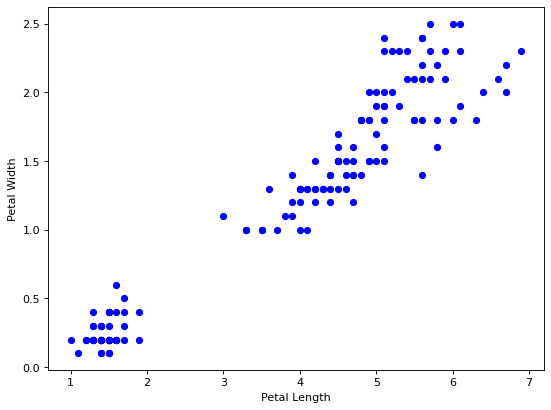

In [12]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(x['Petal Length'], x['Petal Width'], c = 'blue', s = 30)

plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

Ahora apliquemos el modelo

In [16]:
model = KMeans(n_clusters = 3, max_iter =1000)
model.fit(x)
y_labels = model.labels_

Veamos el resultado

In [17]:
y_kmeans = model.predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Veamos la precisión del modelo

In [18]:
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
accuracy

0.7302382722834697

La precisión depende de n_clusters que es la cantidad de grupos que se hacen. Para determinar la cantidad óptima de grupos se aplica el "método del codo", que determina el número de grupos óptimo a partir del valor de x en que la curva parece hacerse una línea recta

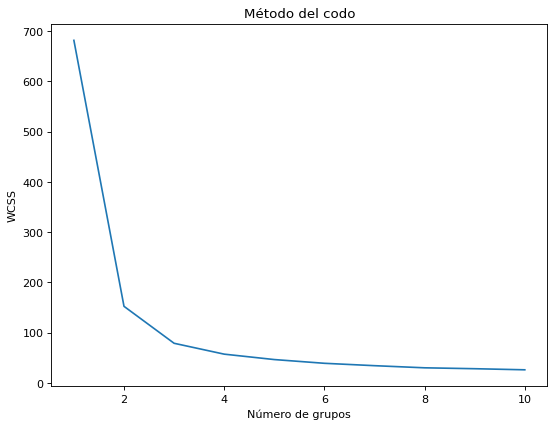

In [19]:
from sklearn.cluster import KMeans

figure(figsize=(8, 6), dpi=80)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de grupos')
plt.ylabel('WCSS')
plt.show()

En la gráfica anterior se observa que el número de grupos óptimo es 3. Existen otros métodos para determinar el número de grupos óptimo, sin embargo, en esta libreta solo se mencionará este

Mostramos nuevamente la gráfica de dispersión pero con las divisiones de grupo obtenidas

Text(0, 0.5, 'Petal Width')

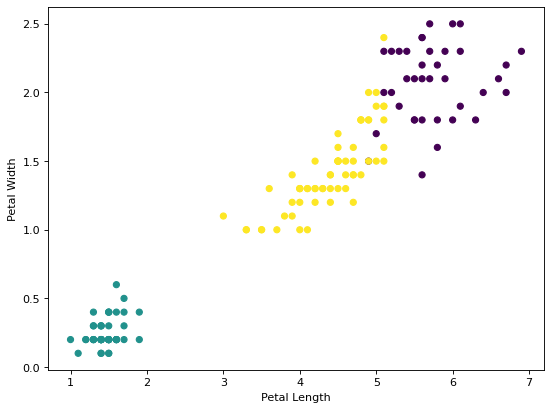

In [20]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(x['Petal Length'], x['Petal Width'], c = y_kmeans, s = 30)

plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)